#Load Data

In [ ]:
import shutil
import os

# Path to the existing dataset directory
dataset_directory = '/content/Alzheimer_s Dataset'

# Check if the directory exists
if os.path.exists(dataset_directory):
    # Remove the directory
    shutil.rmtree(dataset_directory)




Convert to png, easier to work with as it is lossless.

In [1]:
import os
from zipfile import ZipFile, BadZipFile
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from skimage.io import imread, imsave
from skimage.transform import resize
# Unzip the dataset
!unzip "/content/Alzheimer_s Dataset.zip" -d "/content"

# Function to convert images to PNG
def convert_images_to_png(directory):
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            # Check if the file is an image
            if file.lower().endswith(('.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                image = imread(file_path)
                new_file_path = os.path.splitext(file_path)[0] + '.png'
                imsave(new_file_path, image)
                # Remove the original image if it's not already a PNG
                if not file_path.lower().endswith('.png'):
                    os.remove(file_path)

# Path to the directory where the dataset was unzipped
unzipped_dataset_dir = '/content/Alzheimer_s Dataset'

# Convert all images to PNG format
convert_images_to_png(unzipped_dataset_dir)



Streaming output truncated to the last 5000 lines.
  inflating: /content/Alzheimer_s Dataset/Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: /content/Alzheimer_s Dataset/Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: /content/Alzheimer_s Dataset/Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: /content/Alzheimer_s Dataset/Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: /content/Alzheimer_s Dataset/Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: /content/Alzheimer_s Dataset/Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: /content/Alzheimer_s Dataset/Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: /content/Alzheimer_s Dataset/Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: /content/Alzheimer_s Dataset/Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: /content/Alzheimer_s Dataset/Alzheimer_s Dataset/train/

#Exploratory Analysis

Here we check freq of categories to determine proportions. We are clearly dealing with black and white mri images compressed as jpg.

In [17]:

# Define the path to the 'train' directory
train_dir = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train'


train_categories = os.listdir(train_dir)
train_image_count = {}

for category in train_categories:
    category_path = os.path.join(train_dir, category)
    # List all image files in the category's directory
    image_files = [img for img in os.listdir(category_path) if img.lower().endswith('.png')]
    # Update the dictionary with the count of images
    train_image_count[category] = len(image_files)

# Define the path to the 'test' directory
test_dir = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/test'

# List categories in the 'test' directory
test_categories = os.listdir(test_dir)

# Initialize a dictionary to hold the count of images in each category
test_image_count = {}

# Loop through each category in the 'train' directory and count the images
for category in test_categories:
    test_category_path = os.path.join(test_dir, category)
    # List all image files in the category's directory
    image_files = [img for img in os.listdir(test_category_path) if img.lower().endswith('.png')]
    # Update the dictionary with the count of images
    test_image_count[category] = len(image_files)
print("test count freq: ")
test_image_count


test count freq: 


{'MildDemented': 179,
 'VeryMildDemented': 448,
 'ModerateDemented': 12,
 'NonDemented': 640}

In [18]:

print("train freq count: ")
train_image_count

train freq count: 


{'MildDemented': 717,
 'VeryMildDemented': 1792,
 'ModerateDemented': 52,
 'NonDemented': 2560}

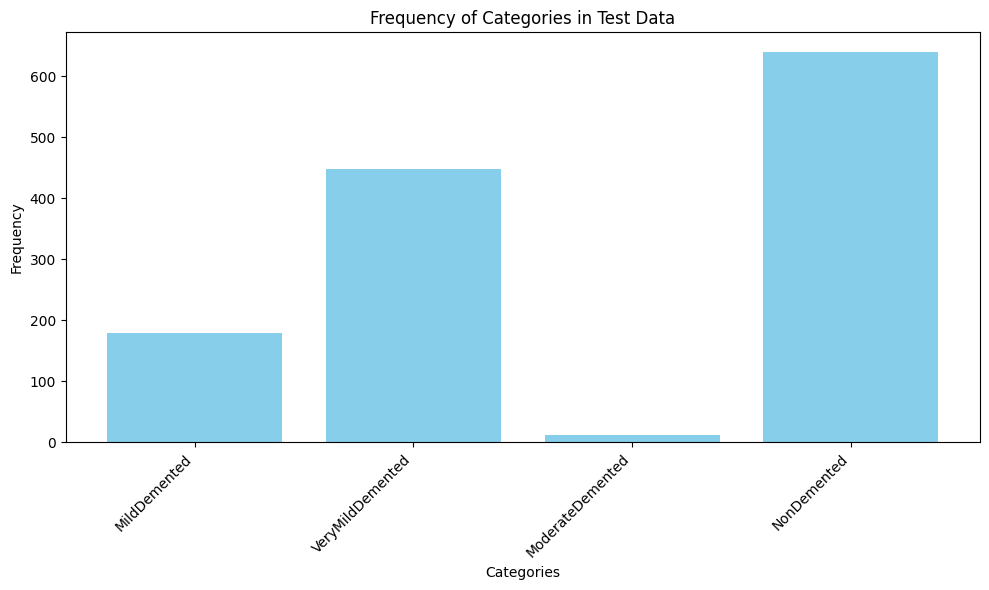

In [19]:
import matplotlib.pyplot as plt

# Extract category names and their corresponding image counts
categories = list(test_image_count.keys())
counts = list(test_image_count.values())

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in Test Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the graph
plt.show()


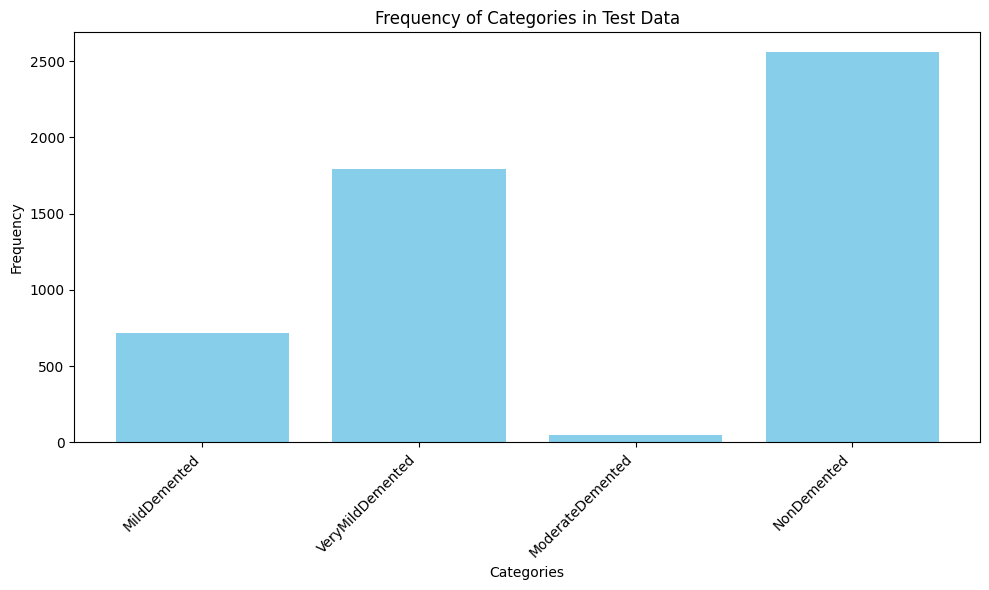

In [20]:
import matplotlib.pyplot as plt

# Extract category names and their corresponding image counts
categories = list(train_image_count.keys())
counts = list(train_image_count.values())

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in Test Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the graph
plt.show()


Double check if data would benefit from contrast enhancement.

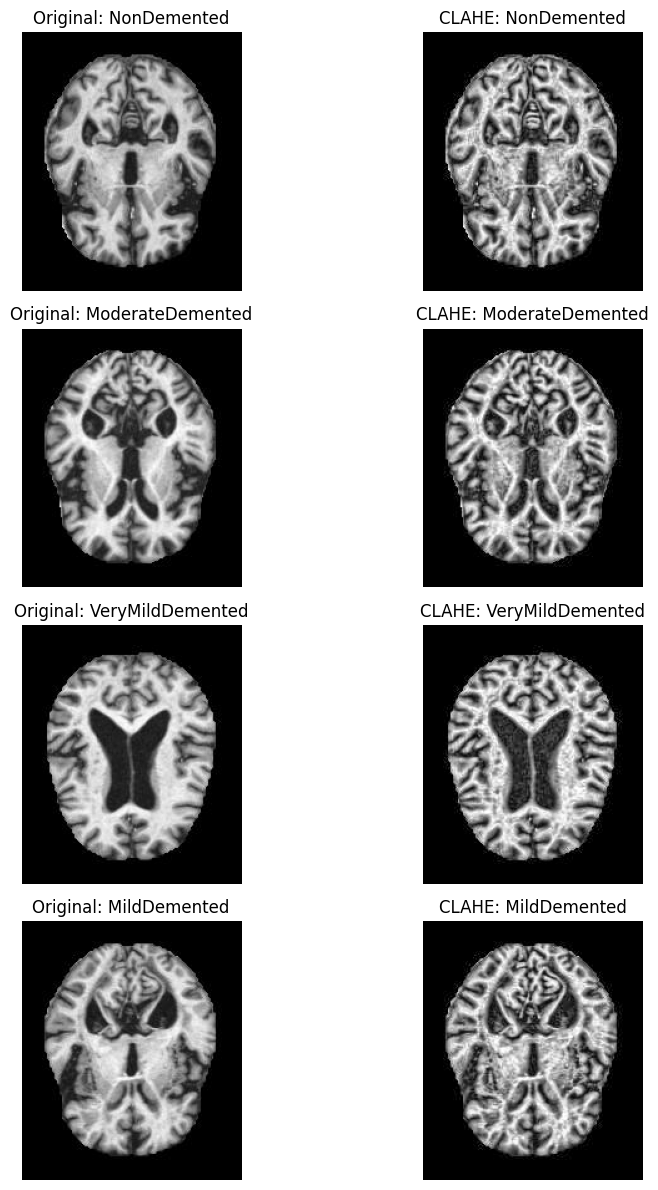

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.io import imread
from skimage import exposure
from skimage.color import rgb2gray

base_dir = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train'

def apply_clahe(image, clip_limit=0.03, tile_grid_size=(8, 8)):
    clahe = exposure.equalize_adapthist(image, clip_limit=clip_limit, nbins=256, kernel_size=tile_grid_size)
    return clahe

def display_contrast_enhanced_images(base_dir):
    categories = os.listdir(base_dir)
    # Set up a figure with one row per category and two columns for original and CLAHE images
    fig, axes = plt.subplots(len(categories), 2, figsize=(10, len(categories) * 3))

    for i, category in enumerate(categories):
        category_path = os.path.join(base_dir, category)
        image_files = os.listdir(category_path)
        # Select one image per category
        img_name = np.random.choice(image_files)
        img_path = os.path.join(category_path, img_name)
        image = imread(img_path, as_gray=True)

        # Apply CLAHE to the selected image
        image_clahe = apply_clahe(image)

        # Display the original image in the first column
        axes[i, 0].imshow(image, cmap='gray')
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f"Original: {category}")

        # Display the CLAHE image in the second column
        axes[i, 1].imshow(image_clahe, cmap='gray')
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f"CLAHE: {category}")

    plt.tight_layout()
    plt.show()

display_contrast_enhanced_images(base_dir)



#GAN


We can use a GAN architecture known as Auxiliary Classifier GAN (AC-GAN), which extends the GAN framework by adding a classification loss to the discriminator, allowing it to classify images into categories while also determining their realness or fakeness. This could be a starting point for a model that uses GANs for both anomaly detection and category prediction.

In [5]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Reshape, Conv2D, Conv2DTranspose, BatchNormalization, Activation, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
import numpy as np

# Define the generator
def build_generator(latent_dim, num_classes, image_shape):
    # Noise input
    noise_input = Input(shape=(latent_dim,))
    # Conditional label input
    label_input = Input(shape=(1,), dtype='int32')

    # Embedding for categorical input
    label_embedding = Embedding(num_classes, latent_dim)(label_input)
    label_embedding = Flatten()(label_embedding)

    # Combine noise and label
    combined_input = Concatenate()([noise_input, label_embedding])

    # Start with a fully connected layer
    x = Dense(256 * 8 * 8, activation='relu')(combined_input)
    x = Reshape((8, 8, 256))(x)

    # Upsampling to 16x16
    x = Conv2DTranspose(128, kernel_size=4, strides=2, padding='same')(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Activation('relu')(x)

    # Upsampling to 32x32
    x = Conv2DTranspose(128, kernel_size=4, strides=2, padding='same')(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Activation('relu')(x)

    # Upsampling to 64x64
    x = Conv2DTranspose(128, kernel_size=4, strides=2, padding='same')(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Activation('relu')(x)

    # Upsampling to 128x128
    x = Conv2DTranspose(128, kernel_size=4, strides=2, padding='same')(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Activation('relu')(x)

    # Upsampling to 256x256
    x = Conv2DTranspose(image_shape[-1], kernel_size=4, strides=2, padding='same')(x)
    output = Activation('tanh')(x)  # Assuming images are normalized between -1 and 1

    # Define model
    generator = Model([noise_input, label_input], output)
    return generator

from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Embedding, Reshape, Concatenate

from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Embedding, Reshape, Concatenate, Activation

def build_discriminator(image_shape, num_classes):
    image_input = Input(shape=image_shape)
    label_input = Input(shape=(1,), dtype='int32')

    # Correct the embedding size to match the image pixels
    label_embedding_size = 256 * 256  # For 256x256 grayscale images
    label_embedding = Embedding(num_classes, label_embedding_size)(label_input)
    label_embedding = Flatten()(label_embedding)

    # Inside your build_discriminator function
    print("Shape after Flatten:", label_embedding.shape)
    label_embedding = Reshape((256, 256, 1))(label_embedding)
    print("Shape after Reshape:", label_embedding.shape)

    combined_input = Concatenate(axis=-1)([image_input, label_embedding])

    # Convolutional layers
    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(combined_input)
    x = Activation('relu')(x)
    x = Conv2D(128, kernel_size=3, strides=2, padding="same")(x)
    x = Activation('relu')(x)
    x = Conv2D(256, kernel_size=3, strides=2, padding="same")(x)
    x = Activation('relu')(x)

    # Flatten for the dense layers
    x = Flatten()(x)

    # Outputs
    validity_output = Dense(1, activation='sigmoid', name='validity_output')(x)
    class_output = Dense(num_classes, activation='softmax', name='class_output')(x)

    return Model(inputs=[image_input, label_input], outputs=[validity_output, class_output])

# Example usage
image_shape = (256, 256, 1)  # Example: MRI images resized to 256x256 with 1 color channel (grayscale)
num_classes = 4  # Example: Number of classes
discriminator = build_discriminator(image_shape, num_classes)


# Print the model summary
discriminator.summary()


Shape after Flatten: (None, 65536)
Shape after Reshape: (None, 256, 256, 1)
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 65536)     262144      ['input_12[0][0]']               
                                                                                                  
 flatten_4 (Flatten)            (None, 65536)        0           ['embedding_2[0][0]']            
                                                                                                  
 input_11 (InputLayer)          [(None, 256, 256, 1  0           []                               
                

In [6]:
# Assuming you have defined 'build_generator' and 'build_discriminator' functions
# and 'preprocess_image' function, and that you have the following variables:
# 'latent_dim' is the dimensionality of the latent space
# 'num_classes' is the number of classes (at least 2 in your case)
import os
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Reshape, Conv2D, Conv2DTranspose, BatchNormalization, Activation, Embedding, Flatten, multiply, Dropout
from tensorflow.keras.optimizers import Adam


# Define the dimensions of the latent space and the number of classes
latent_dim = 100  # Example: 100-dimensional latent vector
num_classes = 4  # Example: 4 classes for different stages of Alzheimer's
image_shape = (256, 256, 1)  # Example: MRI images resized to 256x256 with 1 color channel (grayscale)
# Assuming the rest of your code is correct and as you've posted


# Create the generator and discriminator
generator = build_generator(latent_dim, num_classes, image_shape)
discriminator = build_discriminator(image_shape, num_classes)

# Compile the discriminator with appropriate loss functions
discriminator.compile(
    loss={
        'validity_output': 'binary_crossentropy',  # Name these keys according to your discriminator output layers
        'class_output': 'sparse_categorical_crossentropy'
    },
    optimizer=Adam(0.0002, 0.5),
    metrics=['accuracy']
)
# Ensure discriminator is not trainable when combined with generator
discriminator.trainable = False

# Set up the combined model
noise_input = Input(shape=(latent_dim,))
class_input = Input(shape=(1,))

# Generate an image with the generator
img = generator([noise_input, class_input])



# Get discriminator outputs. Note that we're not unpacking them right away
disc_outputs = discriminator([img, class_input])

# Make sure disc_outputs is a list with two elements
assert isinstance(disc_outputs, list) and len(disc_outputs) == 2, "Discriminator outputs must be a list with two elements."

# Now we can safely unpack because we've confirmed there are two elements
validity_output, class_output = disc_outputs

# Create the combined model with the correct outputs
combined = Model([noise_input, class_input], [validity_output, class_output])

# Compile the combined model with the same loss functions as the discriminator
combined.compile(
    loss=['binary_crossentropy', 'sparse_categorical_crossentropy'],
    optimizer=Adam(0.0002, 0.5)
)



Shape after Flatten: (None, 65536)
Shape after Reshape: (None, 256, 256, 1)


#implement training loop

In [11]:
import numpy as np
import cv2
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.exposure import equalize_adapthist
# Define your image processing functions (apply_clahe, preprocess_image, etc.)
non_demented_directory = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train/NonDemented'
base_directory = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train'
categories = ['ModerateDemented', 'NonDemented', 'VeryMildDemented', 'MildDemented']

def apply_clahe(image, clip_limit=0.01, tile_grid_size=(8, 8)):
    return equalize_adapthist(image, clip_limit=clip_limit, kernel_size=tile_grid_size)

def preprocess_image(image):
    # Resize the image to a consistent shape
    image_resized = resize(image, (256, 256), anti_aliasing=True)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    image_clahe = apply_clahe(image_resized)

    # Normalize the image to have pixel values between 0 and 1
    # It assumes that the pixel values are already in the range 0-255
    image_normalized = (image_clahe / 255.0)*2-1  # Adjust if pixel range is different

    return image_normalized

def process_category(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.png'):  # Adjust for your image format
            filepath = os.path.join(directory, filename)
            # Assume imread and preprocess_image are already defined
            image = imread(filepath, as_gray=True)
            image_preprocessed = preprocess_image(image)
            images.append(image_preprocessed)
    return images

def load_and_preprocess_images(base_directory):
    all_images = []
    all_labels = []
    for category in os.listdir(base_directory):
        category_path = os.path.join(base_directory, category)
        if os.path.isdir(category_path):  # Check if it's a directory
            images = process_category(category_path)
            all_images.extend(images)
            all_labels.extend([category] * len(images))
    all_images = np.array(all_images)
    all_labels = np.array(all_labels)
    print("all_images type:", type(all_images))
    print("all_images shape:", all_images.shape)
    print("all_labels type:", type(all_labels))
    print("all_labels shape:", all_labels.shape)

    return all_images,all_labels
# Load and preprocess images
base_directory = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train'
X_train, y_train = load_and_preprocess_images(base_directory)

# Save processed images and labels as NumPy arrays
np.save('/content/X_train.npy', X_train)
np.save('/content/y_train.npy', y_train)





all_images type: <class 'numpy.ndarray'>
all_images shape: (5121, 256, 256)
all_labels type: <class 'numpy.ndarray'>
all_labels shape: (5121,)


In [12]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers import LeakyReLU, UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import Adam
import os

class ACGAN():
    def __init__(self):
    # Input shape
      self.img_rows = 256
      self.img_cols = 256
      self.channels = 1
      self.img_shape = (self.img_rows, self.img_cols, self.channels)
      self.num_classes = 4
      self.latent_dim = 100
      losses = ['binary_crossentropy', 'sparse_categorical_crossentropy']

      optimizer = Adam(0.0002, 0.5)

    # Build and compile the discriminator
      self.discriminator = self.build_discriminator()
      self.discriminator.compile(loss=losses, optimizer=optimizer, metrics=['accuracy'])

    # Build the generator
      self.generator = self.build_generator()

    # The generator takes noise and the target label as input
    # and generates the corresponding MRI image
      noise = Input(shape=(self.latent_dim,))
      label = Input(shape=(1,))
      img = self.generator([noise, label])

    # For the combined model we will only train the generator
      self.discriminator.trainable = False

    # The discriminator takes generated image as input and determines validity
    # and the label of that image
      valid, target_label = self.discriminator(img)

    # The combined model (stacked generator and discriminator)
      self.combined = Model([noise, label], [valid, target_label])

    # Compile the combined model
      self.combined.compile(loss=losses, optimizer=optimizer)

    def build_generator(self):
      model = Sequential()

      model.add(Dense(128 * 64 * 64, activation="relu", input_dim=self.latent_dim))
      model.add(Reshape((64, 64, 128)))
      model.add(BatchNormalization(momentum=0.8))
      model.add(UpSampling2D())  # Upsamples to 128x128
      model.add(Conv2D(128, kernel_size=3, padding="same"))
      model.add(Activation("relu"))
      model.add(BatchNormalization(momentum=0.8))
      model.add(UpSampling2D())  # Upsamples to 256x256
      model.add(Conv2D(64, kernel_size=3, padding="same"))
      model.add(Activation("relu"))
      model.add(BatchNormalization(momentum=0.8))
      # Removed the last UpSampling2D layer
      model.add(Conv2D(self.channels, kernel_size=3, padding='same'))
      model.add(Activation("tanh"))

      model.summary()

      noise = Input(shape=(self.latent_dim,))
      label = Input(shape=(1,), dtype='int32')
      label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))

      model_input = multiply([noise, label_embedding])
      img = model(model_input)

      return Model([noise, label], img)


    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(16, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(32, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Conv2D(128, kernel_size=3, strides=1, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        model.add(Flatten())
        model.summary()

        img = Input(shape=self.img_shape)

        # Extract feature representation
        features = model(img)

        # Determine validity and label of the image
        validity = Dense(1, activation="sigmoid")(features)
        label = Dense(self.num_classes+1, activation="softmax")(features)

        return Model(img, [validity, label])
    def train(self, epochs, batch_size=128, sample_interval=50):
    # Load the dataset
      X_train, y_train = self.load_data()  # Implement this method based on your dataset

     # Initialize Label Encoder and fit it to the labels
      label_encoder = LabelEncoder()
      y_train_encoded = label_encoder.fit_transform(y_train)

    # Class labels for real and fake images
      valid = np.ones((batch_size, 1))
      fake = np.zeros((batch_size, 1))

      for epoch in range(epochs):
        # ---------------------
        #Train Discriminator
        # ---------------------
        #Select a random batch of images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs, labels = X_train[idx], y_train_encoded[idx]

        #Generate a batch of new images
        noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
        gen_imgs = self.generator.predict([noise, labels])

        #Train the discriminator
        d_loss_real = self.discriminator.train_on_batch(imgs, [valid, labels])
        d_loss_fake = self.discriminator.train_on_batch(gen_imgs, [fake, np.zeros_like(labels)])
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #Train Generator
        # ---------------------
        g_loss = self.combined.train_on_batch([noise, labels], [valid, labels])

        # If at save interval => save generated image samples
        if epoch % sample_interval == 0:
            self.sample_images(epoch)


    def sample_images(self, epoch):
          r, c = 5, 5  # Grid size for displaying generated images (adjust as needed)
          noise = np.random.normal(0, 1, (r * c, self.latent_dim))
    #Generate labels for the Alzheimer's stages (e.g., 0, 1, 2, 3)
          sampled_labels = np.random.randint(0, self.num_classes, (r * c, 1))

    #Generate images
          gen_imgs = self.generator.predict([noise, sampled_labels])

    #Rescale images from [-1,1] to [0,1]
          gen_imgs = 0.5 * gen_imgs + 0.5

    #Create a grid of generated images
          fig, axs = plt.subplots(r, c)
          cnt = 0
          for i in range(r):
              for j in range(c):
                  axs[i,j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')  # Adjust if your images have more than 1 channel
                  axs[i,j].axis('off')
                  cnt += 1
          if not os.path.exists('images'):
            os.makedirs('images')
          fig.savefig("images/epoch_%d.png" % epoch)
          plt.close()


    def load_data(self):
          # Load your Alzheimer's MRI dataset
          X_train = np.load('/content/X_train.npy')
          y_train = np.load('/content/y_train.npy')
          return X_train, y_train

from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


if __name__ == "__main__":
    acgan = ACGAN()
    acgan.train(epochs=10000, batch_size=32, sample_interval=200)

    # Save the models in the recommended format
    acgan.generator.save('/content/generator_model.keras')
    acgan.discriminator.save('/content/discriminator_model.keras')

    # Load the trained generator model
    generator_model = load_model('/content/generator_model.keras', compile=False)  # No need to compile for inference

    # Generate images for testing
    noise = np.random.normal(0, 1, (10, acgan.latent_dim))
    sampled_labels = np.random.randint(0, acgan.num_classes, (10, 1))
    generated_images = generator_model.predict([noise, sampled_labels])

    # Rescale images from [-1,1] to [0,1]
    generated_images = 0.5 * generated_images + 0.5

    # Plot the generated images
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(5, 2, i+1)
        if generated_images.shape[3] == 1:  # Check if images are grayscale
            plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        else:
            plt.imshow(generated_images[i, :, :, :])
        plt.axis('off')
    plt.tight_layout()
    plt.show()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 16)      160       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 128, 128, 16)      0         
                                                                 
 dropout_4 (Dropout)         (None, 128, 128, 16)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 65, 65, 32)       0         
 ng2D)                                                           
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 65, 65, 32)        0         
                                                      

KeyboardInterrupt: ignored

#Transfer Learning Model using pre-trained CNN

Below I will show you the process as well as the adjustments I have made as I was noticing the results. To account for class imbalance and perhaps get bias val_accuracy values, we will weight each category during the training process.

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

# Set paths for training and validation data
train_dir = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train'
test_dir = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/test'
# Define the ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images into the ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))

# Load pre-trained ResNet50 model
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # Assuming 4 classes for Alzheimer's stages
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    class_weight=class_weight_dict  # Include class weights here
)

model.save('/content/pretrained_cnn_model.h5')

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Epoch 1/10
161/161 [==============================] - 26s 141ms/step - loss: 1.6804 - accuracy: 0.2599 - val_loss: 1.1811 - val_accuracy: 0.5027
Epoch 2/10
161/161 [==============================] - 23s 142ms/step - loss: 1.4566 - accuracy: 0.2640 - val_loss: 1.4769 - val_accuracy: 0.0125
Epoch 3/10
161/161 [==============================] - 22s 138ms/step - loss: 1.3801 - accuracy: 0.2830 - val_loss: 1.2983 - val_accuracy: 0.5129
Epoch 4/10
161/161 [==============================] - 23s 139ms/step - loss: 1.3684 - accuracy: 0.3775 - val_loss: 1.2939 - val_accuracy: 0.4848
Epoch 5/10
161/161 [==============================] - 23s 142ms/step - loss: 1.3804 - accuracy: 0.2636 - val_loss: 1.4138 - val_accuracy: 0.0500
Epoch 6/10
161/161 [==============================] - 23s 142ms/step - loss: 1.3720 - accuracy: 0.3037 - val_loss: 1.3640 - val_accuracy: 0.3417
Epoch 7/10
161/161 [==========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


The accuracy values are suggestive of overfitting.Here overfitting is typically indicated when the training loss continues to decrease, but the validation loss starts to increase or stops decreasing. Here we will attempt to use L2 and dropout to prevent overfitting.

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Epoch 1/10
161/161 [==============================] - 27s 145ms/step - loss: 3.6894 - accuracy: 0.2501 - val_loss: 1.4701 - val_accuracy: 0.3495
Epoch 2/10
161/161 [==============================] - 22s 139ms/step - loss: 1.8657 - accuracy: 0.2421 - val_loss: 1.8955 - val_accuracy: 0.0094
Epoch 3/10
161/161 [==============================] - 22s 139ms/step - loss: 1.5974 - accuracy: 0.2111 - val_loss: 1.4718 - val_accuracy: 0.3503
Epoch 4/10
161/161 [==============================] - 22s 138ms/step - loss: 1.5410 - accuracy: 0.2171 - val_loss: 1.5997 - val_accuracy: 0.0094
Epoch 5/10
161/161 [==============================] - 23s 140ms/step - loss: 1.4795 - accuracy: 0.2259 - val_loss: 1.2746 - val_accuracy: 0.5004
Epoch 6/10
161/161 [==============================] - 22s 139ms/step - loss: 1.4834 - accuracy: 0.2078 - val_loss: 1.2767 - val_accuracy: 0.1400
Epoch 7/10
161/161 [==========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


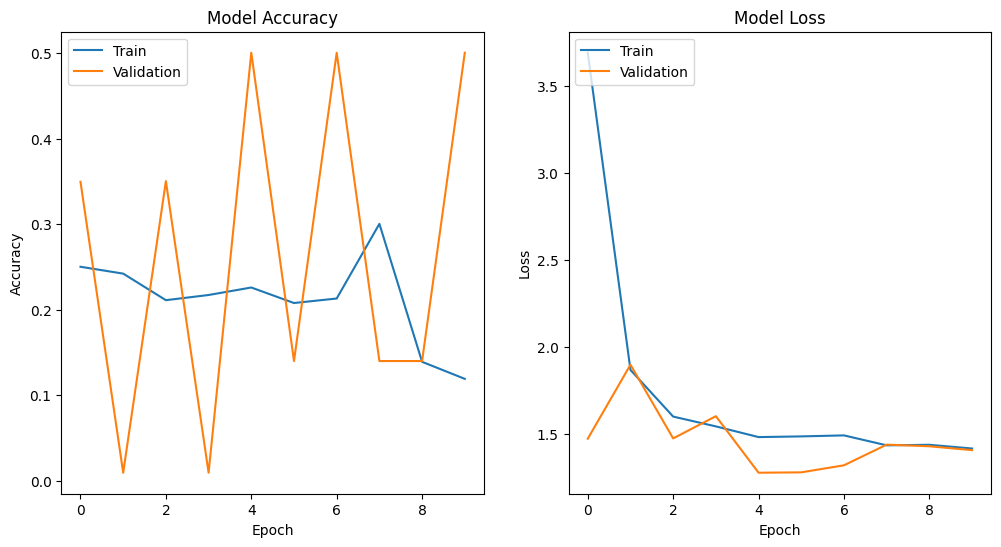

In [8]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os


# Set paths for training and validation data
train_dir = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train'
test_dir = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/test'

from tensorflow.keras.preprocessing.image import img_to_array

def convert_to_three_channels(img):
    # Check if the image is grayscale (2D array), then stack it three times to make it RGB
    if img.ndim == 2:
        img = np.stack((img,) * 3, axis=-1)
    return img


# Now let's update the ImageDataGenerator definitions
train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=convert_to_three_channels   # Make sure to include this in both
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=convert_to_three_channels   # And here
)

# Load images into the ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))

# Load pre-trained ResNet50 model
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Create a new model on top with L2 regularization and dropout
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.01)),  # L2 regularization
    layers.Dropout(0.5),  # Dropout
    layers.Dense(4, activation='softmax')  # Assuming 4 classes for Alzheimer's stages
])

# Compile the model with L2 regularization in the Dense layer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with class weights to handle imbalance
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    class_weight=class_weight_dict  # Include class weights here
)

# Save the model
model.save('/content/pretrained_cnn_model_l2.h5')

# Prepare to display the training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


The results are too sporadic so we will attempt to use batch normalization, and gamma  correction for the images.We will combine dice and cross entropy in loss function, as well as augmentation. Below shows some of the augmentation techniques we used, as well as the images of the batch of augmented images to confirm that these images are appropriate and perhaps a good representation of images we should expect from the test set.

Implementing all of the above, below we will experiment with the learning rates.

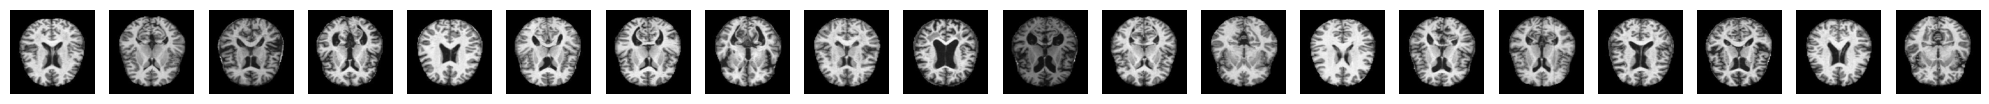

In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from skimage import exposure

def gamma_correction(img):
    gamma = np.random.uniform(0.7, 1.3)  # Adjust the gamma range as needed
    return exposure.adjust_gamma(img, gamma=gamma)

def preprocess_image(img):
    img = convert_to_three_channels(img)  # Convert to three channels
    img = gamma_correction(img)  # Apply gamma correction
    return img

# Update the ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    preprocessing_function=preprocess_image  # Make sure this function is defined correctly
)



# Function to plot images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 20, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Generate a batch of images
images = next(train_generator)[0]  # Get a batch of images

# Plot the first 20 images
plot_images(images[:20])


Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Training with learning rate: 1.0
Epoch 1/10
161/161 [==============================] - ETA: 0s - loss: 345.7707 - precision_8: 0.2639 - recall_8: 0.1289 - auc_7: 0.2796 - accuracy: 0.2730 - f1_score: 0.1732

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2699: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


161/161 [==============================] - 44s 249ms/step - loss: 345.7707 - precision_8: 0.2639 - recall_8: 0.1289 - auc_7: 0.2796 - accuracy: 0.2730 - f1_score: 0.1732 - val_loss: 1.7653 - val_precision_8: 0.0094 - val_recall_8: 0.0094 - val_auc_7: 0.1669 - val_accuracy: 0.0094 - val_f1_score: 0.0094
Epoch 2/10
161/161 [==============================] - 38s 237ms/step - loss: 1.2926 - precision_8: 0.1904 - recall_8: 0.0584 - auc_7: 0.2652 - accuracy: 0.2808 - f1_score: 0.0894 - val_loss: 0.9486 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00 - val_auc_7: 0.4642 - val_accuracy: 0.5004 - val_f1_score: 0.0000e+00
Epoch 3/10
161/161 [==============================] - 37s 231ms/step - loss: 1.2410 - precision_8: 0.1535 - recall_8: 0.0310 - auc_7: 0.2810 - accuracy: 0.2828 - f1_score: 0.0516 - val_loss: 0.8761 - val_precision_8: 0.5004 - val_recall_8: 0.5004 - val_auc_7: 0.4642 - val_accuracy: 0.5004 - val_f1_score: 0.5004
Epoch 4/10
161/161 [==============================] - 38s 

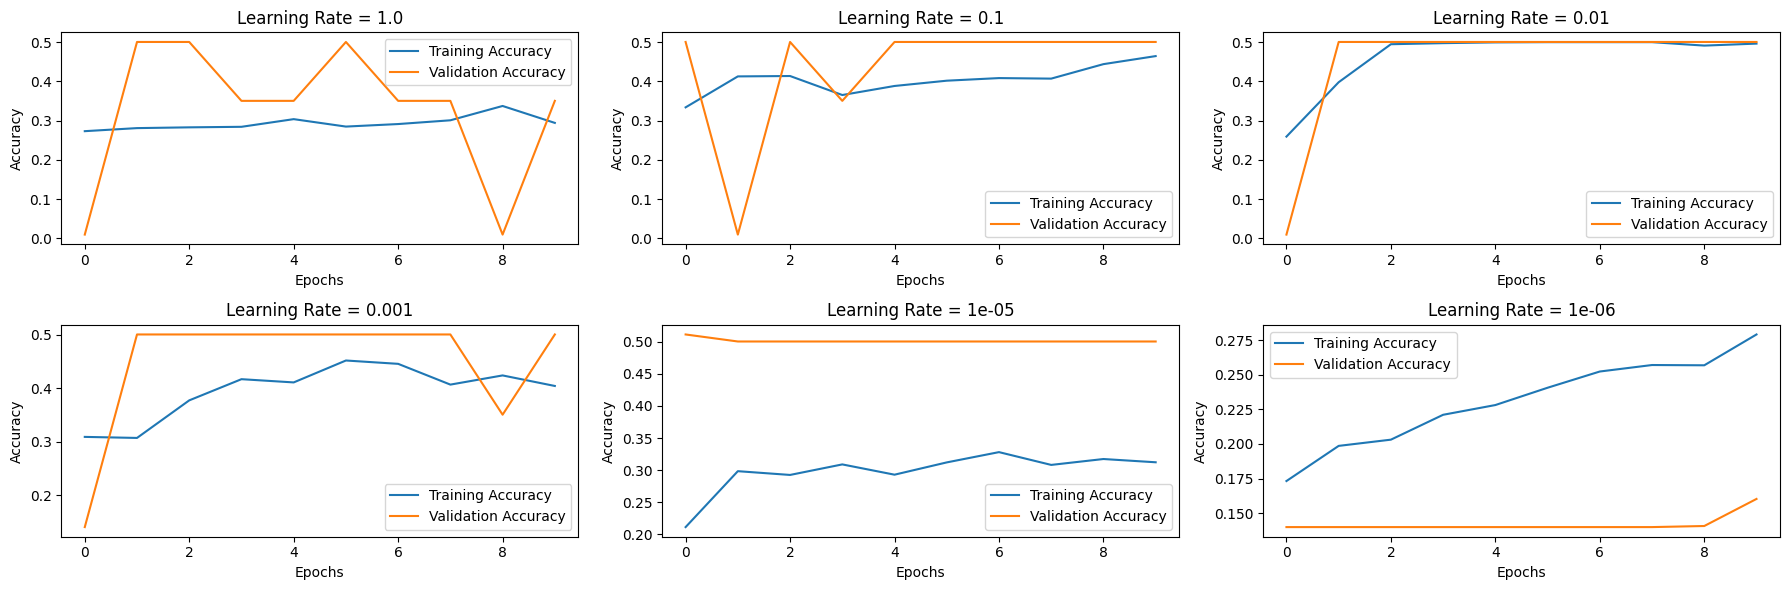

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Activation, GroupNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from skimage import exposure
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras import backend as K


# Corrected dice coefficient for multi-class
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    # Requires one hot encoded y_true and y_pred
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

# Corrected combined loss for multi-class
def combined_loss(y_true, y_pred, alpha=0.5, beta=0.5):
    cce = categorical_crossentropy(y_true, y_pred)
    dice = 1 - dice_coefficient(y_true, y_pred)
    return alpha * cce + beta * dice

# Set paths for training and validation data
train_dir = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train'
test_dir = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/test'

# Preprocessing functions
def convert_to_three_channels(img):
    if img.ndim == 2:
        img = np.stack((img,) * 3, axis=-1)
    return img

def gamma_correction(img):
    gamma = np.random.uniform(0.7, 1.3)
    return exposure.adjust_gamma(img, gamma)

def preprocess_image(img):
    img = convert_to_three_channels(img)
    img = gamma_correction(img)
    return img

# ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    preprocessing_function=preprocess_image
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images into the ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))


# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes
])

# Compile the model
from tensorflow.keras.metrics import Precision, Recall, AUC

# Custom F1 Score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + K.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

from tensorflow.keras.optimizers import SGD

# You can adjust the learning rate and momentum as needed
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=sgd_optimizer,
              loss=combined_loss,
              metrics=[Precision(), Recall(), AUC(curve='PR'), 'accuracy'])
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

# Function to create and compile the model with a given learning rate
# Function to create, compile, and train the model with a given learning rate
def compile_and_train_model(learning_rate, epochs=10, base_model=base_model):
    # Create the model using the base_model passed as an argument
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')  # Assuming 4 classes
    ])

    # Instantiate the F1Score metric
    f1_score = F1Score()

    # Create the SGD optimizer with the given learning rate
    sgd_optimizer = SGD(learning_rate=learning_rate, momentum=0.9)

    # Compile the model with the optimizer and loss function
    model.compile(optimizer=sgd_optimizer,
                  loss=combined_loss,
                  metrics=[Precision(), Recall(), AUC(curve='PR'), 'accuracy', f1_score])

    # Fit the model and save the history
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=epochs,
        class_weight=class_weight_dict
    )

    return history



# List of learning rates to try
learning_rates = [1.0, 0.1, 0.01, 0.001, 1e-5, 1e-6]

# Dictionary to hold the histories
histories = {}

# Loop through each learning rate, compile and train the model, and store the history
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    histories[lr] = compile_and_train_model(learning_rate=lr)

# Plot the results
plt.figure(figsize=(18, 6))

for i, lr in enumerate(learning_rates):
    plt.subplot(2, 3, i+1)
    plt.plot(histories[lr].history['accuracy'], label='Training Accuracy')
    plt.plot(histories[lr].history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Learning Rate = {lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


Precision Plot: This shows how precisely your model is predicting the positive class.

Recall Plot: This indicates the ability of your model to find all the relevant cases within a dataset.

AUC Plot: This represents the measure of the ability of a classifier to distinguish between classes.

Freezing the top layers while compiling the model helped. Increasing the value for epoch would have created an even better model, however this method was computationally infeasible on my current laptop.

Found 5121 images belonging to 4 classes.
Found 5121 images belonging to 4 classes.
Epoch 1/10
161/161 [==============================] - 73s 429ms/step - loss: 1.9290 - precision_50: 0.2712 - recall_49: 0.0967 - auc_32: 0.5741 - accuracy: 0.2882 - val_loss: 1.0231 - val_precision_50: 0.0000e+00 - val_recall_49: 0.0000e+00 - val_auc_32: 0.7794 - val_accuracy: 0.4999
Epoch 2/10
161/161 [==============================] - 67s 420ms/step - loss: 1.0666 - precision_50: 1.0000 - recall_49: 1.9527e-04 - auc_32: 0.7544 - accuracy: 0.4999 - val_loss: 0.9919 - val_precision_50: 0.0000e+00 - val_recall_49: 0.0000e+00 - val_auc_32: 0.7817 - val_accuracy: 0.4999
Epoch 3/10
161/161 [==============================] - 67s 417ms/step - loss: 1.0599 - precision_50: 0.4483 - recall_49: 0.0051 - auc_32: 0.7521 - accuracy: 0.4810 - val_loss: 0.8963 - val_precision_50: 0.0000e+00 - val_recall_49: 0.0000e+00 - val_auc_32: 0.7801 - val_accuracy: 0.4999
Epoch 4/10
161/161 [==============================] - 67s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2699: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


161/161 [==============================] - 104s 549ms/step - loss: 1.0893 - precision_51: 0.4489 - recall_50: 0.1810 - auc_33: 0.6383 - accuracy: 0.3736 - f1_score: 0.2580 - val_loss: 0.9553 - val_precision_51: 0.5560 - val_recall_50: 0.0262 - val_auc_33: 0.7224 - val_accuracy: 0.4134 - val_f1_score: 0.0500
Epoch 2/20
161/161 [==============================] - 88s 546ms/step - loss: 0.9295 - precision_51: 0.5794 - recall_50: 0.2822 - auc_33: 0.7306 - accuracy: 0.4595 - f1_score: 0.3795 - val_loss: 0.8767 - val_precision_51: 0.4961 - val_recall_50: 0.2857 - val_auc_33: 0.7562 - val_accuracy: 0.4749 - val_f1_score: 0.3626
Epoch 3/20
161/161 [==============================] - 87s 541ms/step - loss: 0.8160 - precision_51: 0.6093 - recall_50: 0.3478 - auc_33: 0.7720 - accuracy: 0.5063 - f1_score: 0.4428 - val_loss: 0.9264 - val_precision_51: 0.5027 - val_recall_50: 0.4152 - val_auc_33: 0.7630 - val_accuracy: 0.5015 - val_f1_score: 0.4548
Epoch 4/20
161/161 [==============================] -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


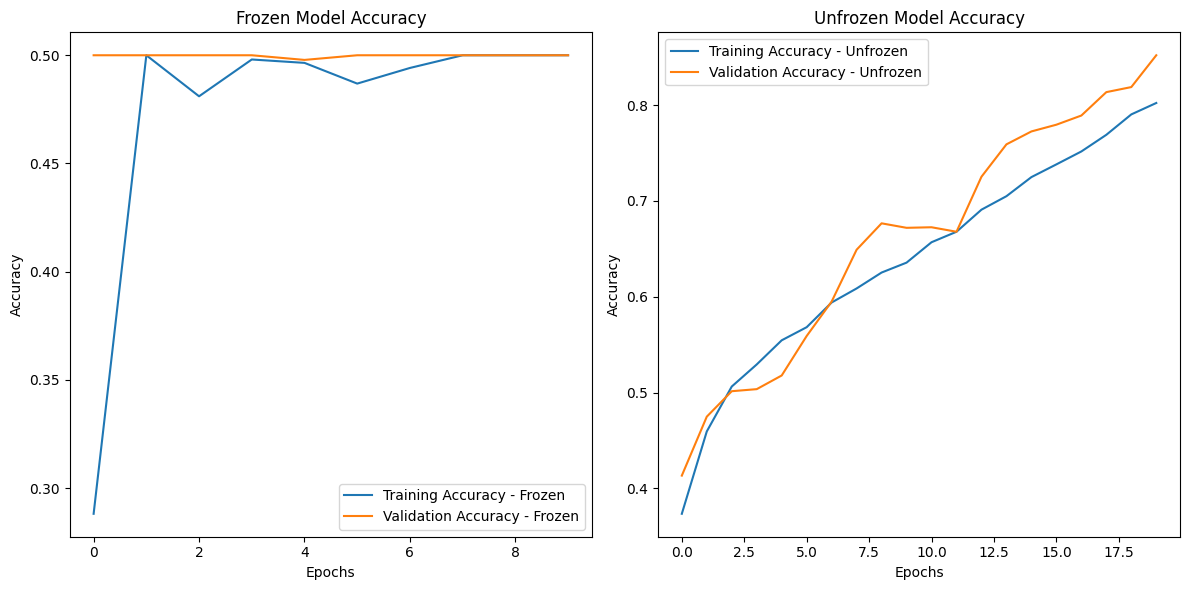

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.utils.class_weight import compute_class_weight
from skimage import exposure
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD  # Corrected line: both Adam and SGD are imported here
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras import backend as K



# Custom F1 Score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + K.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

# Corrected dice coefficient for multi-class
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    # Requires one hot encoded y_true and y_pred
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)


def combined_loss(y_true, y_pred, alpha=0.5, beta=0.5):
    cce = categorical_crossentropy(y_true, y_pred)
    dice = 1 - dice_coefficient(y_true, y_pred)
    return alpha * cce + beta * dice

# Set paths for training and validation data
train_dir = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train'
test_dir = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/test'

# Preprocessing functions
def convert_to_three_channels(img):
    if img.ndim == 2:
        img = np.stack((img,) * 3, axis=-1)
    return img

def gamma_correction(img):
    gamma = np.random.uniform(0.7, 1.3)
    return exposure.adjust_gamma(img, gamma)

def preprocess_image(img):
    img = convert_to_three_channels(img)
    img = gamma_correction(img)
    return img



# ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    preprocessing_function=preprocess_image
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    preprocessing_function=preprocess_image
)
# Load images into the ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))


from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras import backend as K
from sklearn.utils.class_weight import compute_class_weight


# Assume other preprocessing steps and data generators are defined above

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import SGD

# Assume other necessary imports and code are already defined above

# Load the pre-trained ResNet50 model without the top layer (so you can add your own)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Phase 1: Training with the base model frozen
base_model.trainable = False
model_frozen = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes
])

# Compile the model
model_frozen.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                     loss=combined_loss,
                     metrics=[Precision(), Recall(), AUC(), 'accuracy'])

# Fit the model and save the history for the frozen phase
history_frozen = model_frozen.fit(train_generator, validation_data=validation_generator,
                                  epochs=10, class_weight=class_weight_dict)

# Phase 2: Unfreeze the base model for fine-tuning
base_model.trainable = True

# It's important to recompile the model after you make any changes to the `trainable` attribute of any layer within the model.
model_unfrozen = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes
])

model_unfrozen.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9),
                       loss=combined_loss,
                       metrics=[Precision(), Recall(), AUC(), 'accuracy', F1Score()])

# Continue training and save the history for the unfrozen phase
history_unfrozen = model_unfrozen.fit(train_generator, validation_data=validation_generator,
                                      epochs=20, class_weight=class_weight_dict)
model_unfrozen.save('my_model.h5')

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training and validation accuracy for the frozen phase
plt.subplot(1, 2, 1)
plt.plot(history_frozen.history['accuracy'], label='Training Accuracy - Frozen')
plt.plot(history_frozen.history['val_accuracy'], label='Validation Accuracy - Frozen')
plt.title('Frozen Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation accuracy for the unfrozen phase
plt.subplot(1, 2, 2)
plt.plot(history_unfrozen.history['accuracy'], label='Training Accuracy - Unfrozen')
plt.plot(history_unfrozen.history['val_accuracy'], label='Validation Accuracy - Unfrozen')
plt.title('Unfrozen Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [30]:
model_unfrozen.save('my_model')


Unfrozen Model Accuracy (Right Plot):

Both the training and validation accuracies improve significantly over time, which is a good sign.
The validation accuracy remains close to the training accuracy, suggesting that the model is generalizing well and not overfitting.

**Accuracy Results**

In [34]:
# Assuming that test_datagen has been defined using ImageDataGenerator with appropriate preprocessing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # It's important to set shuffle to False for evaluation
)

# Load the model from the SavedModel directory
model = load_model('my_model', custom_objects={
    'combined_loss': combined_loss,
    # 'custom_metric': custom_metric, if you have any other custom metrics
})
# Evaluate the model
from sklearn.metrics import classification_report

# Predict the labels of the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Obtain the true labels
y_true = test_generator.classes

# Calculate classification report which includes F1 Score
report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print(report)



Found 1279 images belonging to 4 classes.
40/40 [==============================] - 10s 225ms/step
                  precision    recall  f1-score   support

    MildDemented       0.58      0.35      0.43       179
ModerateDemented       0.77      0.83      0.80        12
     NonDemented       0.76      0.74      0.75       640
VeryMildDemented       0.54      0.65      0.59       448

        accuracy                           0.65      1279
       macro avg       0.66      0.64      0.64      1279
    weighted avg       0.66      0.65      0.65      1279



In [35]:
!zip -r "/content/my_model.zip" "/content/my_model"


  adding: content/my_model/ (stored 0%)
  adding: content/my_model/fingerprint.pb (stored 0%)
  adding: content/my_model/variables/ (stored 0%)
  adding: content/my_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/my_model/variables/variables.index (deflated 78%)
  adding: content/my_model/keras_metadata.pb (deflated 96%)
  adding: content/my_model/assets/ (stored 0%)
  adding: content/my_model/saved_model.pb (deflated 91%)


Review batches of images created from augmentation prior to beginning.

original test done with augmentation(insert which ones)

The model is not performing well due to class imbalance, so we will try another approach, class validation and regularization techniques on

#Deep Learning Model w/out pretrained model

Without the benefit of a pretrained model, we have to resort to other methods to continue to have an accurate model. The imbalance of classes being the main culprit(previous models were only successfully at predicting the MRI images for healthy patients). After careful optimization, instead of using class weights to account for the imbalance we will use stratified k-folds. The results below on an intermediate model will show that we are converging to a validation accuracyof 50%, suggestive of class imbalance, and a model that is only good at classifying healthy patients. It's important to note that the healthy patients represent 50% of the training set.

In [58]:
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    # Requires one hot encoded y_true and y_pred
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def convert_to_three_channels(img):
    # Check if the image is grayscale (assuming grayscale images have shape (height, width))
    if len(img.shape) == 2 or img.shape[2] == 1:
        img = np.stack((img,) * 3, axis=-1)
    return img

def combined_loss(y_true, y_pred, alpha=0.5, beta=0.5):
    cce = categorical_crossentropy(y_true, y_pred)
    dice = 1 - dice_coefficient(y_true, y_pred)
    return alpha * cce + beta * dice
def gamma_correction(img):
    #print("Before gamma correction:", np.min(img), np.max(img))
    gamma = np.random.uniform(0.7, 1.3)
    img = exposure.adjust_gamma(img, gamma)
    img = np.clip(img, 0, 1)  # Ensuring values are within [0, 1]
    img = (img * 2) - 1  # Rescale to [-1, 1]
   # print("After gamma correction:", np.min(img), np.max(img))
    return img
def preprocess_image(img):
    img = convert_to_three_channels(img)
    img = gamma_correction(img)
    return img

In [59]:

# ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    preprocessing_function=preprocess_image
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    preprocessing_function=preprocess_image
)
# Load images into the ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)


Found 5121 images belonging to 4 classes.
Found 5121 images belonging to 4 classes.


In [68]:
import os
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming 'base_path' is the path to the 'Alzheimer_s Dataset/train' directory
base_path = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train'
categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Create lists to store file paths and labels
X = []  # File paths
y = []  # Corresponding labels

# Loop through each category and collect file paths and labels
for label, category in enumerate(categories):
    category_path = os.path.join(base_path, category)
    for file in os.listdir(category_path):
        if file.endswith('.png'):  # Assuming the images are in JPG format
            X.append(os.path.join(category_path, file))
            y.append(label)  # The label is the index of the category

# Convert labels list to a NumPy array
import numpy as np
y = np.array(y)

# Initialize StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# This will give you indices to split data into training and validation set.
for train_index, val_index in skf.split(X, y):
    # Here, X_train_paths and X_val_paths are lists of file paths
    X_train_paths, X_val_paths = [X[i] for i in train_index], [X[i] for i in val_index]
    y_train, y_val = y[train_index], y[val_index]



In [69]:
# Convert labels to class names
labels = np.array([categories[i] for i in y])

# Initialize StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Now we create a DataFrame with file paths and class names (not indices)
data = pd.DataFrame({
    'file_path': X,  # List of file paths
    'label': labels  # List of class names
})
# Create DataFrames for the current fold
train_df = data.iloc[train_index]
val_df = data.iloc[val_index]

# Now use flow_from_dataframe to create generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Make sure labels are one-hot encoded
)

validation_generator = test_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='file_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Make sure labels are one-hot encoded
)


Found 4097 validated image filenames belonging to 4 classes.
Found 1024 validated image filenames belonging to 4 classes.


Below is the final model for DNN using stratified k-folds instead of class weights.

In [71]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

# Assuming 'base_path' is the path to the 'Alzheimer_s Dataset/train' directory
base_path = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train'
categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Create lists to store file paths and labels
X = []  # File paths
y = []  # Corresponding labels

# Loop through each category and collect file paths and labels
for label, category in enumerate(categories):
    category_path = os.path.join(base_path, category)
    for file in os.listdir(category_path):
        if file.endswith('.png'):  # Assuming the images are in JPG format
            X.append(os.path.join(category_path, file))
            y.append(label)  # The label is the index of the category

# Convert labels to class names
labels = np.array([categories[i] for i in y])

# Create a DataFrame with file paths and class names
data = pd.DataFrame({
    'file_path': X,
    'label': labels
})

# Initialize StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3]
    # Add any other augmentations as needed
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define a function to create a new instance of the model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(len(categories), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Loop over the folds
for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
    print(f"Training on fold {fold+1}/{n_splits}...")

    # Create DataFrames for the current fold
    train_df = data.iloc[train_index]
    val_df = data.iloc[val_index]

    # Create generators using flow_from_dataframe
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='file_path',
        y_col='label',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    validation_generator = test_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col='file_path',
        y_col='label',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    # Create a new model instance
    model = create_model()

    # Fit the model
    history = model.fit(
        train_generator,
        epochs=10,  # Adjust the number of epochs
        validation_data=validation_generator
    )

#save model!

Training on fold 1/5...
Found 4096 validated image filenames belonging to 4 classes.
Found 1025 validated image filenames belonging to 4 classes.
Epoch 1/10
128/128 [==============================] - 176s 156ms/step - loss: 1.1729 - accuracy: 0.5439 - val_loss: 13.3678 - val_accuracy: 0.4995
Epoch 2/10
128/128 [==============================] - 19s 146ms/step - loss: 0.7175 - accuracy: 0.6978 - val_loss: 2.7167 - val_accuracy: 0.4995
Epoch 3/10
128/128 [==============================] - 19s 146ms/step - loss: 0.4526 - accuracy: 0.8125 - val_loss: 1.4416 - val_accuracy: 0.5015
Epoch 4/10
128/128 [==============================] - 20s 153ms/step - loss: 0.2645 - accuracy: 0.8984 - val_loss: 0.4937 - val_accuracy: 0.8137
Epoch 5/10
128/128 [==============================] - 18s 144ms/step - loss: 0.1995 - accuracy: 0.9248 - val_loss: 0.3485 - val_accuracy: 0.8683
Epoch 6/10
128/128 [==============================] - 19s 146ms/step - loss: 0.1282 - accuracy: 0.9573 - val_loss: 0.3826 - val

In [7]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

# Assuming 'base_path' is the path to the 'Alzheimer_s Dataset/train' directory
base_path = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train'
categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Create lists to store file paths and labels
X = []  # File paths
y = []  # Corresponding labels

# Loop through each category and collect file paths and labels
for label, category in enumerate(categories):
    category_path = os.path.join(base_path, category)
    for file in os.listdir(category_path):
        if file.endswith('.png'):  # Assuming the images are in JPG format
            X.append(os.path.join(category_path, file))
            y.append(label)  # The label is the index of the category

# Convert labels to class names
labels = np.array([categories[i] for i in y])

# Create a DataFrame with file paths and class names
data = pd.DataFrame({
    'file_path': X,
    'label': labels
})

# Initialize StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3]
    # Add any other augmentations as needed
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define a function to create a new instance of the model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(len(categories), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

base_path = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train'
categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Create lists to store file paths and labels
X = []  # File paths
y = []  # Corresponding labels

for label, category in enumerate(categories):
    category_path = os.path.join(base_path, category)
    for file in os.listdir(category_path):
        if file.endswith('.png'):  # Assuming the images are in JPG format
            X.append(os.path.join(category_path, file))
            y.append(label)  # The label is the index of the category

# Convert labels to class names
labels = np.array([categories[i] for i in y])

# Create a DataFrame with file paths and class names
data = pd.DataFrame({
    'file_path': X,
    'label': labels
})

# Initialize StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


Training on fold 1/5...
Found 4096 validated image filenames belonging to 4 classes.
Found 1025 validated image filenames belonging to 4 classes.
Epoch 1/10
128/128 [==============================] - 15s 103ms/step - loss: 1.1732 - accuracy: 0.5430 - val_loss: 2.3745 - val_accuracy: 0.4995
Epoch 2/10
128/128 [==============================] - 13s 99ms/step - loss: 0.7121 - accuracy: 0.7065 - val_loss: 2.0454 - val_accuracy: 0.5005
Epoch 3/10
128/128 [==============================] - 13s 101ms/step - loss: 0.4110 - accuracy: 0.8337 - val_loss: 2.4750 - val_accuracy: 0.5015
Epoch 4/10
128/128 [==============================] - 13s 100ms/step - loss: 0.2835 - accuracy: 0.8958 - val_loss: 1.3925 - val_accuracy: 0.5483
Epoch 5/10
128/128 [==============================] - 13s 102ms/step - loss: 0.2023 - accuracy: 0.9265 - val_loss: 1.1365 - val_accuracy: 0.6127
Epoch 6/10
128/128 [==============================] - 13s 99ms/step - loss: 0.1495 - accuracy: 0.9490 - val_loss: 0.3843 - val_acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


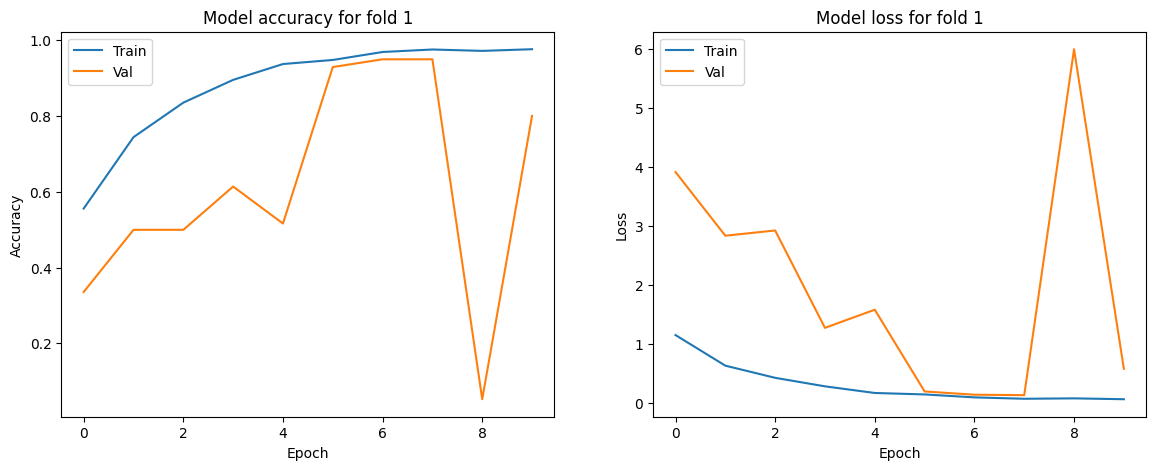

Training on fold 2/5...
Found 4097 validated image filenames belonging to 4 classes.
Found 1024 validated image filenames belonging to 4 classes.
Epoch 1/10
129/129 [==============================] - 15s 101ms/step - loss: 1.1926 - accuracy: 0.5414 - val_loss: 8.9259 - val_accuracy: 0.3496
Epoch 2/10
129/129 [==============================] - 13s 98ms/step - loss: 0.6926 - accuracy: 0.7149 - val_loss: 27.4436 - val_accuracy: 0.4961
Epoch 3/10
129/129 [==============================] - 13s 99ms/step - loss: 0.4182 - accuracy: 0.8379 - val_loss: 2.0425 - val_accuracy: 0.5977
Epoch 4/10
129/129 [==============================] - 13s 99ms/step - loss: 0.2571 - accuracy: 0.9014 - val_loss: 1.3769 - val_accuracy: 0.6797
Epoch 5/10
129/129 [==============================] - 13s 98ms/step - loss: 0.2590 - accuracy: 0.8994 - val_loss: 245.6948 - val_accuracy: 0.1221
Epoch 6/10
129/129 [==============================] - 14s 105ms/step - loss: 0.2457 - accuracy: 0.9075 - val_loss: 743.8612 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


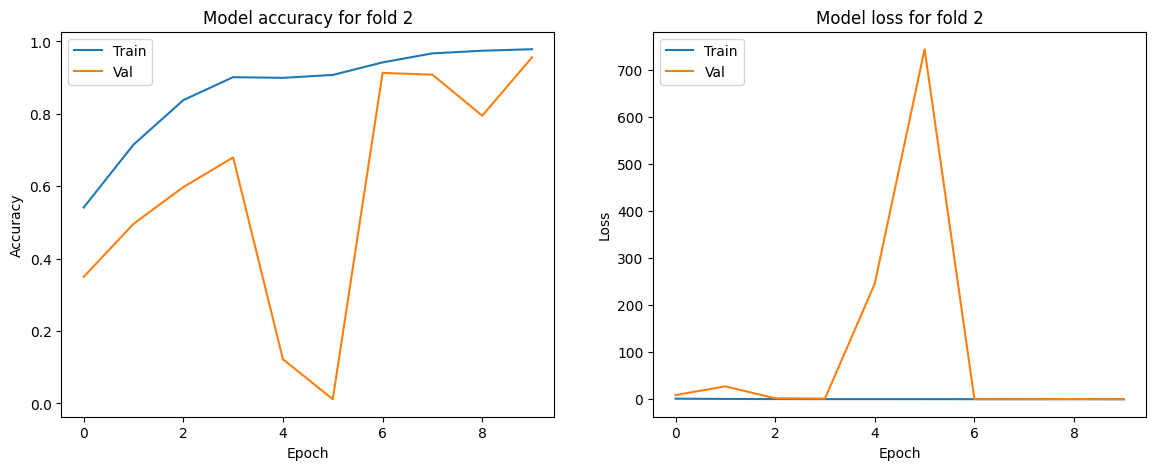

Training on fold 3/5...
Found 4097 validated image filenames belonging to 4 classes.
Found 1024 validated image filenames belonging to 4 classes.
Epoch 1/10
129/129 [==============================] - 15s 100ms/step - loss: 1.1449 - accuracy: 0.5372 - val_loss: 2.2491 - val_accuracy: 0.5000
Epoch 2/10
129/129 [==============================] - 13s 99ms/step - loss: 0.6906 - accuracy: 0.7122 - val_loss: 17.1690 - val_accuracy: 0.3301
Epoch 3/10
129/129 [==============================] - 13s 100ms/step - loss: 0.5047 - accuracy: 0.7989 - val_loss: 7.7232 - val_accuracy: 0.3496
Epoch 4/10
129/129 [==============================] - 13s 99ms/step - loss: 0.2993 - accuracy: 0.8799 - val_loss: 0.8465 - val_accuracy: 0.7334
Epoch 5/10
129/129 [==============================] - 13s 104ms/step - loss: 0.2168 - accuracy: 0.9170 - val_loss: 0.7835 - val_accuracy: 0.6895
Epoch 6/10
129/129 [==============================] - 13s 98ms/step - loss: 0.1413 - accuracy: 0.9522 - val_loss: 1.1244 - val_acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


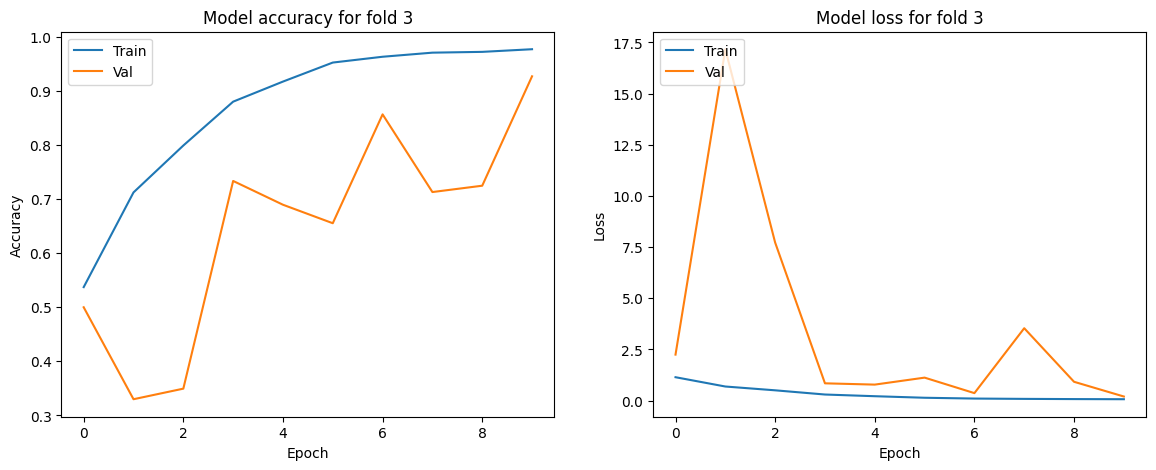

Training on fold 4/5...
Found 4097 validated image filenames belonging to 4 classes.
Found 1024 validated image filenames belonging to 4 classes.
Epoch 1/10
129/129 [==============================] - 15s 100ms/step - loss: 1.2018 - accuracy: 0.5382 - val_loss: 9.0119 - val_accuracy: 0.3496
Epoch 2/10
129/129 [==============================] - 13s 102ms/step - loss: 0.6825 - accuracy: 0.7161 - val_loss: 4.3098 - val_accuracy: 0.5000
Epoch 3/10
129/129 [==============================] - 13s 98ms/step - loss: 0.4678 - accuracy: 0.8199 - val_loss: 1.9259 - val_accuracy: 0.5000
Epoch 4/10
129/129 [==============================] - 13s 101ms/step - loss: 0.2962 - accuracy: 0.8926 - val_loss: 0.8232 - val_accuracy: 0.6582
Epoch 5/10
129/129 [==============================] - 13s 99ms/step - loss: 0.1919 - accuracy: 0.9302 - val_loss: 0.7086 - val_accuracy: 0.6914
Epoch 6/10
129/129 [==============================] - 13s 102ms/step - loss: 0.1370 - accuracy: 0.9531 - val_loss: 0.7929 - val_acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


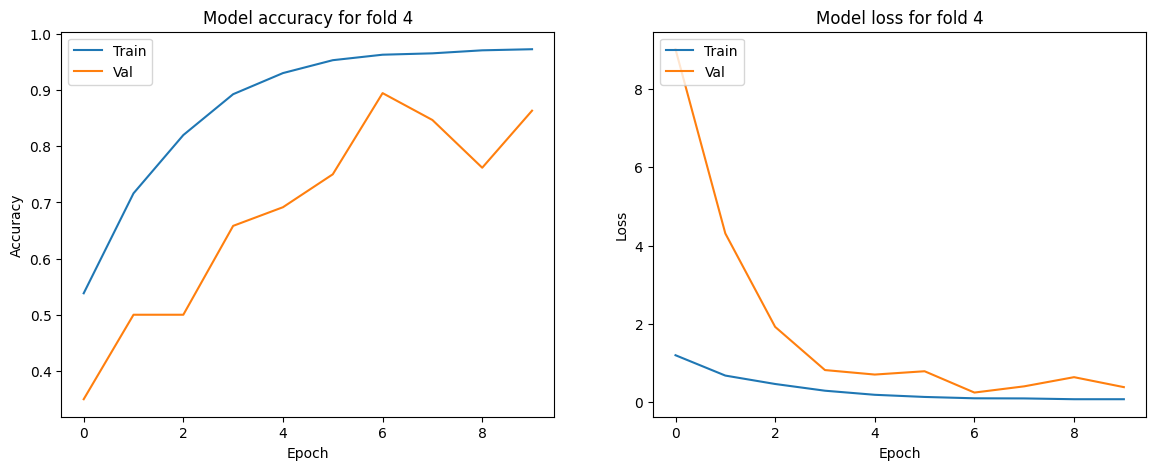

Training on fold 5/5...
Found 4097 validated image filenames belonging to 4 classes.
Found 1024 validated image filenames belonging to 4 classes.
Epoch 1/10
129/129 [==============================] - 16s 104ms/step - loss: 1.2006 - accuracy: 0.5411 - val_loss: 8.8353 - val_accuracy: 0.3506
Epoch 2/10
129/129 [==============================] - 13s 101ms/step - loss: 0.6947 - accuracy: 0.7093 - val_loss: 3.5004 - val_accuracy: 0.5000
Epoch 3/10
129/129 [==============================] - 13s 103ms/step - loss: 0.4356 - accuracy: 0.8313 - val_loss: 9.4088 - val_accuracy: 0.5000
Epoch 4/10
129/129 [==============================] - 13s 100ms/step - loss: 0.3218 - accuracy: 0.8719 - val_loss: 47.5610 - val_accuracy: 0.3564
Epoch 5/10
129/129 [==============================] - 13s 100ms/step - loss: 0.2723 - accuracy: 0.8987 - val_loss: 17.5326 - val_accuracy: 0.2402
Epoch 6/10
129/129 [==============================] - 13s 102ms/step - loss: 0.1455 - accuracy: 0.9495 - val_loss: 0.3087 - val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


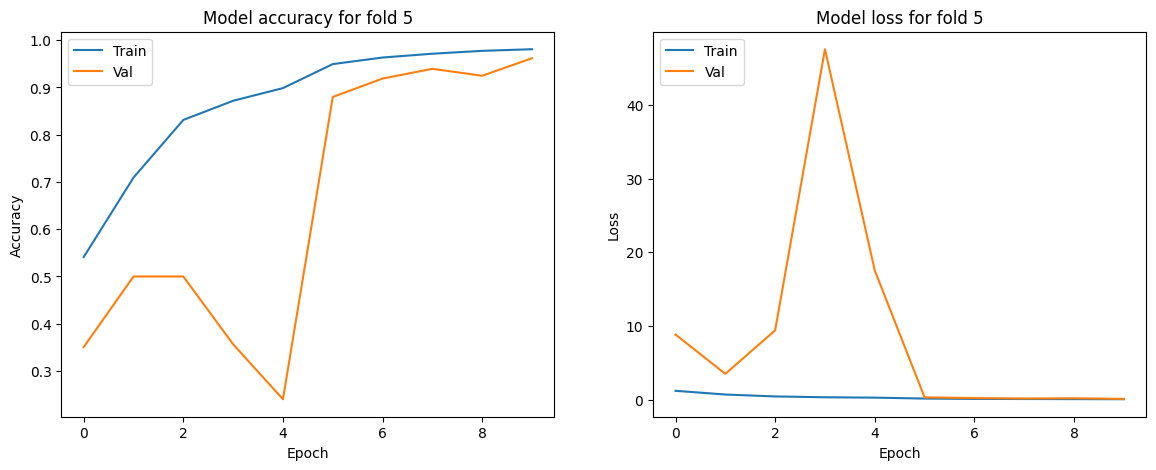

In [4]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

# Assuming 'base_path' is the path to the 'Alzheimer_s Dataset/train' directory
base_path = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train'
categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Create lists to store file paths and labels
X = []  # File paths
y = []  # Corresponding labels

# Loop through each category and collect file paths and labels
for label, category in enumerate(categories):
    category_path = os.path.join(base_path, category)
    for file in os.listdir(category_path):
        if file.endswith('.png'):  # Assuming the images are in JPG format
            X.append(os.path.join(category_path, file))
            y.append(label)  # The label is the index of the category

# Convert labels to class names
labels = np.array([categories[i] for i in y])

# Create a DataFrame with file paths and class names
data = pd.DataFrame({
    'file_path': X,
    'label': labels
})

# Initialize StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3]
    # Add any other augmentations as needed
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define a function to create a new instance of the model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(len(categories), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#save model!import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

# Assuming 'base_path' is the path to the 'Alzheimer_s Dataset/train' directory
base_path = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train'
categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Create lists to store file paths and labels
X = []  # File paths
y = []  # Corresponding labels

# Loop through each category and collect file paths and labels
for label, category in enumerate(categories):
    category_path = os.path.join(base_path, category)
    for file in os.listdir(category_path):
        if file.endswith('.png'):  # Assuming the images are in JPG format
            X.append(os.path.join(category_path, file))
            y.append(label)  # The label is the index of the category

# Convert labels to class names
labels = np.array([categories[i] for i in y])

# Create a DataFrame with file paths and class names
data = pd.DataFrame({
    'file_path': X,
    'label': labels
})

# Initialize StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3]
    # Add any other augmentations as needed
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define a function to create a new instance of the model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(len(categories), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

import matplotlib.pyplot as plt
# Loop over the folds
for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
    print(f"Training on fold {fold+1}/{n_splits}...")

    # Create DataFrames for the current fold
    train_df = data.iloc[train_index]
    val_df = data.iloc[val_index]

    # Create generators using flow_from_dataframe
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='file_path',
        y_col='label',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    validation_generator = test_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col='file_path',
        y_col='label',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    # Create a new model instance
    model = create_model()

    # Fit the model
    history = model.fit(
        train_generator,
        epochs=10,  # Adjust the number of epochs
        validation_data=validation_generator
    )

    # Save the model
    model.save(f'my_custom_cnn_model_fold_{fold+1}.h5')

    # Plot the accuracy and loss
    plt.figure(figsize=(14, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy for fold {fold+1}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model loss for fold {fold+1}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Save the plot
    plt.savefig(f'model_accuracy_loss_fold_{fold+1}.png')

    # Show the plot
    plt.show()



In [6]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/content/Alzheimer_s Dataset/Alzheimer_s Dataset/test'

# Create the test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Loop over the folds for evaluation
for fold in range(1, n_splits + 1):
    print(f"Evaluating fold {fold} model on test data...")
    model = load_model(f'my_custom_cnn_model_fold_{fold}.h5')

    # Predict the labels on the test dataset
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)

    # Obtain the true labels
    y_true = test_generator.classes

    # Calculate the classification report
    report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
    print(report)

    # Optionally, calculate accuracy or other metrics if needed
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy for fold {fold}: {accuracy}')


Found 1279 images belonging to 4 classes.
Evaluating fold 1 model on test data...
40/40 [==============================] - 2s 50ms/step
                  precision    recall  f1-score   support

    MildDemented       0.88      0.08      0.14       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.54      0.99      0.70       640
VeryMildDemented       0.82      0.17      0.28       448

        accuracy                           0.56      1279
       macro avg       0.56      0.31      0.28      1279
    weighted avg       0.68      0.56      0.47      1279

Accuracy for fold 1: 0.5629397967161845
Evaluating fold 2 model on test data...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


40/40 [==============================] - 2s 48ms/step
                  precision    recall  f1-score   support

    MildDemented       0.78      0.18      0.29       179
ModerateDemented       1.00      0.25      0.40        12
     NonDemented       0.58      0.95      0.72       640
VeryMildDemented       0.73      0.32      0.44       448

        accuracy                           0.61      1279
       macro avg       0.77      0.42      0.46      1279
    weighted avg       0.67      0.61      0.56      1279

Accuracy for fold 2: 0.6129788897576232
Evaluating fold 3 model on test data...
40/40 [==============================] - 2s 47ms/step
                  precision    recall  f1-score   support

    MildDemented       0.57      0.54      0.55       179
ModerateDemented       1.00      0.33      0.50        12
     NonDemented       0.75      0.63      0.68       640
VeryMildDemented       0.53      0.67      0.59       448

        accuracy                           0.63      

#Autoencoder Method (Student Designed Model)

In [13]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Define the encoder
input_img = Input(shape=(224, 224, 3))  # Use the correct input shape
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
# Add more layers as needed
# ...

# Define the decoder
decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
# Add more layers as needed to reconstruct the input
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder (you'll need to provide training data here)
# autoencoder.fit(...)

# Define the encoder model for feature extraction
encoder = Model(input_img, encoded)

#train your classifier with k-fold cross-validation,
# use the encoder to transform your images into the lower-dimensional feature space
# and then proceed with your existing k-fold strategy.


In [15]:
encoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def your_preprocess_function(file_path):
    # Load the image file
    img = load_img(file_path, target_size=(224, 224))  # Resize the image to 224x224

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Rescale the image (as the model was trained with rescaling)
    img_array = img_array / 255.0

    # Expand the dimensions so the image is (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)

    return img_array



from sklearn.model_selection import StratifiedKFold
# Define the encoder model from your autoencoder (assume autoencoder is already trained)
encoder = Model(autoencoder.input, autoencoder.get_layer('conv2d_13').output)

# Initialize StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Function to preprocess and encode images using the trained encoder
def encode_images(file_paths, encoder):
    encoded_images = []
    for file_path in file_paths:
        # Preprocess the image (resize, rescale, etc.)
        img = your_preprocess_function(file_path)
        # Use encoder to predict and transform the image to feature representation
        encoded_img = encoder.predict(img)
        encoded_images.append(encoded_img)
    return np.array(encoded_images)

In [2]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def load_dataset(dataset_path, image_size=(224, 224)):
    categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
    images = []
    labels = []

    # Iterate over each category
    for category in categories:
        category_path = os.path.join(dataset_path, category)
        category_label = categories.index(category)

        # Iterate over each image in the category
        for image_file in os.listdir(category_path):
            image_path = os.path.join(category_path, image_file)
            image = load_img(image_path, target_size=image_size)
            image = img_to_array(image)

            images.append(image)
            labels.append(category_label)

    # Convert lists to numpy arrays
    X = np.array(images, dtype='float32')
    X /= 255.0  # Normalize to [0, 1]
    y = np.array(labels, dtype='int')

    return X, y


# Load your dataset and labels here
X_train, y_train = load_dataset('/content/Alzheimer_s Dataset/Alzheimer_s Dataset/train')
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

# Encoder
input_img = Input(shape=(224, 224, 3))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)  # at this point the representation is (28, 28, 8) i.e. 6272-dimensional

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)  # Upsample to (56, 56, 8)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)  # Upsample to (112, 112, 8)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)  # Upsample to (224, 224, 16)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Output is (224, 224, 3)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=5, batch_size=128, shuffle=True, validation_data=(X_test, X_test))

# Define the encoder model from the trained autoencoder
encoder = Model(inputs=autoencoder.input, outputs=encoded)

# Use the encoder to encode images
encoded_images_train = encoder.predict(X_train)
encoded_images_test = encoder.predict(X_test)

# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = len(np.unique(y_train))
one_hot_labels_train = to_categorical(y_train, num_classes=num_classes)
one_hot_labels_test = to_categorical(y_test, num_classes=num_classes)

# Calculate the flattened size of the encoder's output
encoded_shape = (28, 28, 8)  # This is the shape of the encoder's output
flattened_size = np.prod(encoded_shape)  # Flatten size is calculated from the encoder's output shape

# Flatten the encoded output
encoded_images_train_flat = encoded_images_train.reshape(-1, flattened_size)
encoded_images_test_flat = encoded_images_test.reshape(-1, flattened_size)

# Define and compile your classifier model with the correct input shape
classifier_input = Input(shape=(flattened_size,))  # Correct the input shape based on your flattened encoder's output size
x = Dense(128, activation='relu')(classifier_input)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
output = Dense(num_classes, activation='softmax')(x)

classifier = Model(inputs=classifier_input, outputs=output)
classifier.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classifier on the flattened encoded images
classifier.fit(encoded_images_train_flat, one_hot_labels_train, epochs=5, batch_size=128, validation_data=(encoded_images_test_flat, one_hot_labels_test))

# Make predictions on test data
predictions = classifier.predict(encoded_images_test_flat)

# Evaluate the classifier
loss, accuracy = classifier.evaluate(encoded_images_test_flat, one_hot_labels_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')


Epoch 1/5
32/32 [==============================] - 7s 164ms/step - loss: 0.1249 - val_loss: 0.0611
Epoch 2/5
32/32 [==============================] - 3s 88ms/step - loss: 0.0242 - val_loss: 0.0118
Epoch 3/5
32/32 [==============================] - 3s 91ms/step - loss: 0.0109 - val_loss: 0.0100
Epoch 4/5
32/32 [==============================] - 3s 87ms/step - loss: 0.0097 - val_loss: 0.0093
Epoch 5/5
33/33 [==============================] - 0s 8ms/step
Epoch 1/5
32/32 [==============================] - 2s 12ms/step - loss: 1.1347 - accuracy: 0.5586 - val_loss: 1.9264 - val_accuracy: 0.4868
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6605 - accuracy: 0.7979 - val_loss: 1.7224 - val_accuracy: 0.2546
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 0.3572 - accuracy: 0.9121 - val_loss: 1.7153 - val_accuracy: 0.1834
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.1908 - accuracy: 0.9626 - val_loss: 1.1051 - val_accu

In [5]:
# Define the class labels based on your dataset
categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Predicted classes from the classifier
predicted_classes = np.argmax(predictions, axis=1)

# True classes from the one-hot encoded labels
true_classes = np.argmax(one_hot_labels_test, axis=1)

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=categories)

# Calculate the accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

print(report)
print(f'Accuracy: {accuracy}')


                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       159
ModerateDemented       0.04      0.94      0.08        16
     NonDemented       0.70      0.91      0.79       499
VeryMildDemented       1.00      0.01      0.03       351

        accuracy                           0.46      1025
       macro avg       0.43      0.47      0.22      1025
    weighted avg       0.68      0.46      0.40      1025

Accuracy: 0.4634146341463415


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Analysis:

+------------------+-----------+--------+----------+---------+
|      Class       | Precision | Recall | F1-Score | Support |
+------------------+-----------+--------+----------+---------+
|   MildDemented   |   0.58    |  0.35  |   0.43   |   179   |
| ModerateDemented |   0.77    |  0.83  |   0.8    |   12    |
|   NonDemented    |   0.76    |  0.74  |   0.75   |   640   |
| VeryMildDemented |   0.54    |  0.65  |   0.59   |   448   |
|     accuracy     |           |  0.65  |          |  1279   |
|    macro avg     |   0.66    |  0.64  |   0.64   |  1279   |
|   weighted avg   |   0.66    |  0.65  |   0.65   |  1279   |
+------------------+-----------+--------+----------+---------+


Deep Learning Model Results (without pretrained model):


In [2]:
from tabulate import tabulate

# Assuming `results` is a list of dictionaries with your classification report data
results = [
    {
        'Fold': 1,
        'Precision': {'MildDemented': 0.88, 'ModerateDemented': 0.00, 'NonDemented': 0.54, 'VeryMildDemented': 0.82},
        'Recall': {'MildDemented': 0.08, 'ModerateDemented': 0.00, 'NonDemented': 0.99, 'VeryMildDemented': 0.17},
        'F1-Score': {'MildDemented': 0.14, 'ModerateDemented': 0.00, 'NonDemented': 0.70, 'VeryMildDemented': 0.28},
        'Support': {'MildDemented': 179, 'ModerateDemented': 12, 'NonDemented': 640, 'VeryMildDemented': 448},
        'Accuracy': 0.56
    },
    # Add similar dictionaries for each fold...
]

# Prepare data for tabulate
headers = ['Fold', 'Class', 'Precision', 'Recall', 'F1-Score', 'Support', 'Accuracy']
table_data = []

for result in results:
    accuracy = result['Accuracy']
    for class_name, precision in result['Precision'].items():
        recall = result['Recall'][class_name]
        f1_score = result['F1-Score'][class_name]
        support = result['Support'][class_name]
        fold = result['Fold']

        table_data.append([fold, class_name, precision, recall, f1_score, support, accuracy])

# Print table
print(tabulate(table_data, headers=headers, tablefmt='github'))



|   Fold | Class            |   Precision |   Recall |   F1-Score |   Support |   Accuracy |
|--------|------------------|-------------|----------|------------|-----------|------------|
|      1 | MildDemented     |        0.88 |     0.08 |       0.14 |       179 |       0.56 |
|      1 | ModerateDemented |        0    |     0    |       0    |        12 |       0.56 |
|      1 | NonDemented      |        0.54 |     0.99 |       0.7  |       640 |       0.56 |
|      1 | VeryMildDemented |        0.82 |     0.17 |       0.28 |       448 |       0.56 |


Autoencoder results:
Test loss: 2.4009108543395996, Test accuracy: 0.46341463923454285

In [7]:
from prettytable import PrettyTable
from sklearn.metrics import classification_report

# Define the class labels based on your dataset
categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Predicted classes from the classifier
predicted_classes = np.argmax(predictions, axis=1)

# True classes from the one-hot encoded labels
true_classes = np.argmax(one_hot_labels_test, axis=1)

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=categories, output_dict=True)

# Create a PrettyTable to display the report
table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]

for category in categories:
    precision = report[category]['precision']
    recall = report[category]['recall']
    f1_score = report[category]['f1-score']
    support = report[category]['support']

    table.add_row([category, precision, recall, f1_score, support])

# Print the table
print(table)


+------------------+---------------------+----------------------+----------------------+---------+
|      Class       |      Precision      |        Recall        |       F1-Score       | Support |
+------------------+---------------------+----------------------+----------------------+---------+
|   MildDemented   |         0.0         |         0.0          |         0.0          |   159   |
| ModerateDemented | 0.04076086956521739 |        0.9375        |       0.078125       |    16   |
|   NonDemented    |  0.6978527607361963 |  0.9118236472945892  |  0.790616854908775   |   499   |
| VeryMildDemented |         1.0         | 0.014245014245014245 | 0.028089887640449437 |   351   |
+------------------+---------------------+----------------------+----------------------+---------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In practice, MRI images have a specific formats with an incredible amount of density or slices for each patient. That is, for each patient we should expect thousands of high quality image slices for each patient. However, the same cannot be said for this dataset (i.e. Moderate Demented Category only contains  52 images  in the trained set). There is an incredible amount of imbalance within the classes as well, which hopefully as you can see above, plenty of steps were needed to accountfor this. Including segmentation for the transfer learning model, and k-folds stratification for the DNN model. If I had more time,I would have implemented k-folds stratification into the transfer learning model to helpincrease the accuracy. As I did attempt to create an AC-GAN model (the code is above), it was simply computationally infeasible to implement on my laptop. Hence my designed model was using an autoencoder.

The transfer learning model performed the best overall, with the F1 score= 0.66.
While the DNN model performed well during testing, the accuracy was not as high, and the model accuracy graph for tran and validation sets were too sporatic for increasing epoch values. You can see each of these graphs above.

However, it is important to note that the DNN model, the results indicate that the model is producing a more balanced prediction across different classes after using stratified k-fold cross-validation. This cannot be said for the pretrained model using ResNet-50.

The autoencoder method performed relatively well considering it is not designed for non-binary classification prediction. In order to update this I would like to incorporation k-folds stratification into the model. However, it would be best in my opinion to compile AC-GANS, as that is most suited for classification compared to all of the above methods.
